# Assignment 4

**Aim** : To build a CNN model for performing binary classification on flower dataset.

Improved accuracy and reduced loss than previous model.

In [ ]:
# import libraries

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow  as tf

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [ ]:
# prepare train and test dataset

train = ImageDataGenerator(rescale = 1/255)
test = ImageDataGenerator(rescale = 1/255)

# Train and Test each contains two directories,  rose and sunflower
# Train/rose and Train/sunflower
# Test/rose and Test/sunflower

train_dataset = train.flow_from_directory("Train/",
                                          target_size=(150,150),
                                          batch_size = 20,
                                          class_mode = 'binary')

test_dataset = test.flow_from_directory("Test/",
                                          target_size=(150,150),
                                          batch_size = 20,
                                          class_mode = 'binary')

Found 1190 images belonging to 2 classes.
Found 327 images belonging to 2 classes.


In [ ]:
test_dataset.class_indices

{'rose': 0, 'sunflower': 1}

In [ ]:
# build model

# added dropout layers

model = Sequential([
    Conv2D(32,(3,3),activation='relu', input_shape=(150,150,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(.4),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(.4),
    Dense(1,activation='sigmoid')
    ])



In [ ]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_dataset,epochs=10)


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 177ms/step - accuracy: 0.6768 - loss: 0.6552
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 171ms/step - accuracy: 0.9101 - loss: 0.2465
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step - accuracy: 0.9004 - loss: 0.2555
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 172ms/step - accuracy: 0.9113 - loss: 0.2241
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 178ms/step - accuracy: 0.9486 - loss: 0.1368
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 174ms/step - accuracy: 0.9421 - loss: 0.1453
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 183ms/step - accuracy: 0.9352 - loss: 0.1495
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 172ms/step - accuracy: 0.9751 - loss: 0.0719
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step - accuracy: 0.9682 - loss: 0.0917
Epoch 10/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 172ms/step - accuracy: 0.9886 - loss: 0.0520


In [ ]:
train_loss, train_accuracy = model.evaluate(train_dataset)

print("Train Loss : ", train_loss*100)
print("Train Accuracy : ", train_accuracy*100)

60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.9920 - loss: 0.0259
Train Loss :  2.7466388419270515
Train Accuracy :  99.07562732696533


In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)

print("Test Loss : ", test_loss*100)
print("Test Accuracy : ", test_accuracy*100)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.9252 - loss: 0.2684
Test Loss :  32.24567472934723
Test Accuracy :  90.51987528800964


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[0.]]
Predicted class: Rose


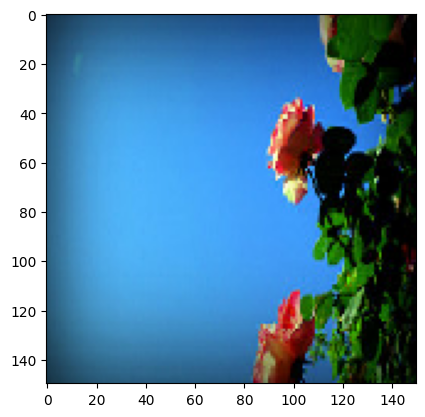

In [ ]:
import random

dir = ['rose', 'sunflower']

image_dir = random.choice(dir)
image_path = 'Test/' + image_dir

# List all image files in the directory
image_files = [os.path.join(image_path, f) for f in os.listdir(image_path) if os.path.isfile(os.path.join(image_path, f))]

#  selecting random image in directory
random_img_path = random.choice(image_files)

plt.imshow(image.load_img(random_img_path,target_size=(150,150)))

# Load the random image for prediction
img = image.load_img(random_img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size

# Predict the image
predictions = model.predict(img_array)
print(predictions)

# Convert prediction to class label
class_label = "Rose" if predictions[0][0] == 0 else "Sunflower"  # Assuming 0 is for rose and 1 is for cat
print("Predicted class:", class_label)


In [ ]:
model.save('binaryClassification.h5')